# **Project Name**    - 



##### **Project Type**    -  Regression
##### **Contribution**    - Individual
##### **Team Member - Saurabh Sharma**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/Saurabhshrma/YesBank-Stock-Closing-Price-Predicton

# **Problem Statement**


**Write Problem Statement Here.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [161]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
from matplotlib.dates import DateFormatter
import seaborn as sns
from scipy import stats

### Dataset Loading

In [162]:
# Load Dataset
df = pd.read_csv('data_YesBank_StockPrices.csv')

### Dataset First View

In [163]:
# Dataset First Look
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [164]:
# Dataset Rows & Columns count
df.shape

(185, 5)

### Dataset Information

In [165]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [166]:
# Dataset Duplicate Value Count
for i in df:
    print(i,':',df[i].count() - df[i].nunique())

Date : 0
Open : 2
High : 1
Low : 2
Close : 0


In [167]:
# We can se there are no null values in date , and open , high , low can have duplicate values by chance as they're prices
# of stock in particular month.

In [168]:
#converting datet column to date format
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')

In [169]:
# Print the starting and ending dates
print("Start Date:", min(df['Date']))
print("End Date:", max(df['Date']))

Start Date: 2005-07-01 00:00:00
End Date: 2020-11-01 00:00:00


### What did you know about your dataset?

Answer Here 

1 - The data is a list of Stock prices observations of YesBank. Each row represents closing price of YesBank Stock of that     month, and the columns contain information about the behaviour of that stock such as high price , low price ,open price     , closing price.
    

2 - There are 185 rows and 5 columns out of which 4 contains numerical data and 1 contains categorical.

3 - No Null values are present in any of the field.

4 - Date column doesn't have duplicates too , We got quite cleaned data.

5 - The Range of Date is in between Jul-05 to Nov-20.



## ***2. Understanding Your Variables***

In [170]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [171]:
# Dataset Describe
df.describe(include= 'all')

C:\Users\saura\AppData\Local\Temp/ipykernel_18700/2055231012.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include= 'all')


,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,2005-07-01 00:00:00,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
first,2005-07-01 00:00:00,NaN,NaN,NaN,NaN
last,2020-11-01 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000


### Variables Description 

Date: the date of the observation

Open: the opening value of the stock price for the month

High: the highest value of the stock price for the month

Low: the lowest value of the stock price for the month

Close: the closing value of the stock price for the month

## 3. ***Data Wrangling***

### Data Wrangling Code

In [172]:
# Write your code to make your dataset analysis ready.
# creatig a copy
stock_df = df.copy()

# Convert the date column to datetime type
stock_df['Date'] = pd.to_datetime(stock_df['Date'], format='%b-%y')

stock_df

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,2020-07-01,25.60,28.30,11.10,11.95
181,2020-08-01,12.00,17.16,11.85,14.37
182,2020-09-01,14.30,15.34,12.75,13.15
183,2020-10-01,13.30,14.01,12.11,12.42


In [173]:
# Create a new column named "volatility" , It show how much fluctuations is in market in that month
stock_df["Volatility"] = stock_df["High"] - stock_df["Low"]

# Creating a new column, that shows how much stock price increased or dereased in a month
stock_df['Return'] = stock_df['Open'] - stock_df['Close']

#Creating new column , containing year and month
stock_df['Year'] = stock_df['Date'].dt.year
stock_df['Month'] = stock_df['Date'].dt.month


stock_df

,Date,Open,High,Low,Close,Volatility,Return,Year,Month
0,2005-07-01,13.00,14.00,11.25,12.46,2.75,0.54,2005,7
1,2005-08-01,12.58,14.88,12.55,13.42,2.33,-0.84,2005,8
2,2005-09-01,13.48,14.87,12.27,13.30,2.60,0.18,2005,9
3,2005-10-01,13.20,14.47,12.40,12.99,2.07,0.21,2005,10
4,2005-11-01,13.35,13.88,12.88,13.41,1.00,-0.06,2005,11
...,...,...,...,...,...,...,...,...,...
180,2020-07-01,25.60,28.30,11.10,11.95,17.20,13.65,2020,7
181,2020-08-01,12.00,17.16,11.85,14.37,5.31,-2.37,2020,8
182,2020-09-01,14.30,15.34,12.75,13.15,2.59,1.15,2020,9
183,2020-10-01,13.30,14.01,12.11,12.42,1.90,0.88,2020,10


In [174]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        185 non-null    datetime64[ns]
 1   Open        185 non-null    float64       
 2   High        185 non-null    float64       
 3   Low         185 non-null    float64       
 4   Close       185 non-null    float64       
 5   Volatility  185 non-null    float64       
 6   Return      185 non-null    float64       
 7   Year        185 non-null    int64         
 8   Month       185 non-null    int64         
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 13.1 KB


### What all manipulations have you done and insights you found?

We converted 'Date' column to datetime object.

We also created some new columns named 

Volatality : (High Price) - (Low Price) # Differnce between months highest and lowest price

Return : (Open Price) - (Close Price)  # How much return one can expect if bought a stock in the beginning of the month.

Price Change : monthly percentage change of the "Close" column

Year : Seperated year from Date

Month : Seperated month from Date to check seasonality

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

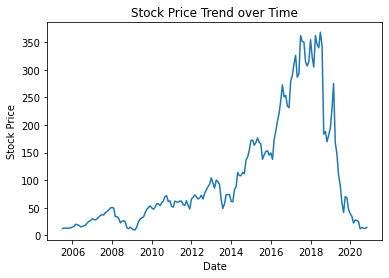

In [80]:
# Line chart
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Trend over Time')
plt.show()

##### 1. Why did you pick the specific chart?

I picked a line chart to visualize the trend of the stock price over time. This chart provides a clear and simple visual representation of the movement of the stock price, making it easy to identify trends and patterns.

##### 2. What is/are the insight(s) found from the chart?

From the chart, we can see that the stock price fluctuates over time, with some periods of growth and some periods of decline. This information can provide valuable insights into the stock's performance and help us make informed decisions about investments.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from this chart can have a positive impact on business decisions. For example, the chart can help investors determine whether the stock is likely to rise or fall in the future, and make decisions about when to buy or sell the stock. Additionally, the chart can provide information about the overall health of the company, which can be useful in making investment decisions.

#### Chart - 2

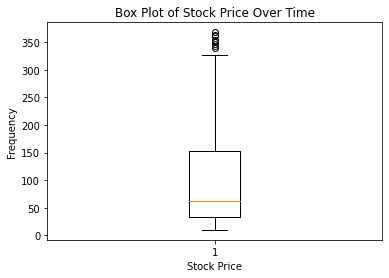

In [81]:
# Chart - 2 visualization code
import matplotlib.pyplot as plt

plt.boxplot(df['Close'])
plt.xlabel('Stock Price')
plt.ylabel('Frequency')
plt.title('Box Plot of Stock Price Over Time')
plt.show()


##### 1. Why did you pick the specific chart?

A box plot is a useful visual tool to see the distribution of the data, identify outliers, and see if there are any skewness in the data. In this case, we are using a box plot to visualize the distribution of the Close price of the stock over time.


##### 2. What is/are the insight(s) found from the chart?

The box plot of stock prices over time shows that the closing stock prices have a few outliers that are much higher than the rest of the values. The median value is around 70, and the interquartile range is between approximately 30 and 120. 


##### 3. Will the gained insights help creating a positive business impact? 


The gained insights from the box plot can help in identifying the extreme values in the data that may impact the model's performance if not handled correctly.

#### Chart - 3

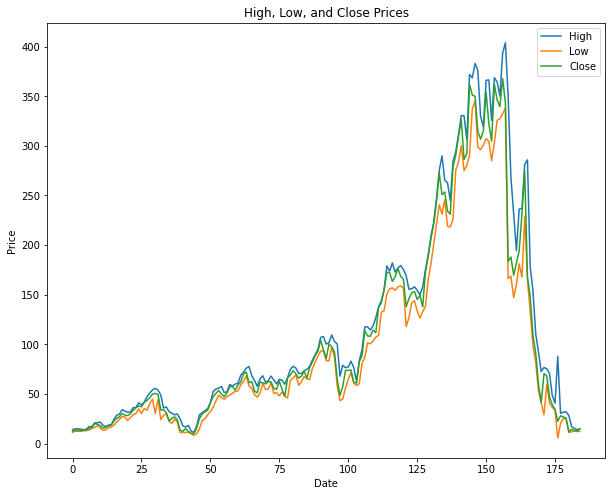

In [82]:
# Chart - 3 visualization code
plt.figure(figsize=(10, 8))

plt.plot(df['High'], label='High')
plt.plot(df['Low'], label='Low')
plt.plot(df['Close'], label='Close')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('High, Low, and Close Prices')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

I picked this chart because it provides a quick overview of the stock prices over a period of time. The line graph makes it easy to see the general trend of the prices, and it allows us to compare the High, Low, and Close prices against each other.

##### 2. What is/are the insight(s) found from the chart?

From the chart, we can see how the High, Low, and Close prices are related to each other, and how they change over time. By comparing the three lines, we can see whether the High price is generally higher than the Close price.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights from the chart can be used to inform investment decisions, for example. By analyzing the trends in the High, Low, and Close prices, investors can make informed decisions about buying or selling stocks.

#### Chart - 4

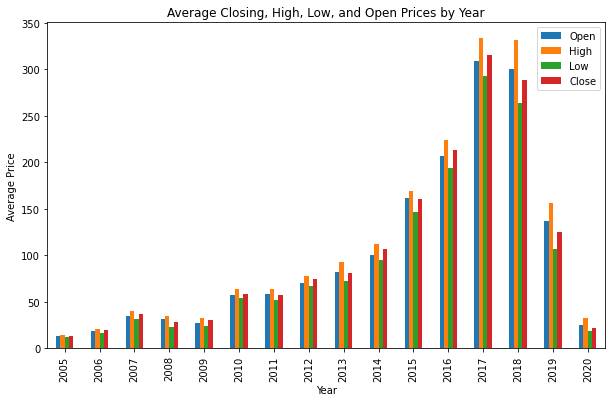

In [32]:
# Chart - 4 visualization code
# Group the data by year and calculate the average for each year for the closing, high, low, and open prices
grouped = stock_df.groupby('Year').mean()[['Open', 'High', 'Low', 'Close']]

# Plot the bar graph
grouped.plot(kind='bar', figsize=(10, 6))

# Set the x-axis label
plt.xlabel('Year')

# Set the y-axis label
plt.ylabel('Average Price')

# Set the title
plt.title('Average Closing, High, Low, and Open Prices by Year')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

I picked this chart because it provides a quick overview of the stock prices over a period of time. The bar graph makes it easy to see the values, and it allows us to compare the High, Low,Open and Close prices against each other for every year.

##### 2. What is/are the insight(s) found from the chart?

From the chart, we can see that the average closing, high, low, and open prices of the stock have been fluctuating over the years. We can see that the closing and high prices have been consistently increasing from 2005 to 2017, after which there is a sharp drop in 2018. Similarly, the low and open prices have been fluctuating, but there is no significant trend.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can have a positive impact on making informed investment decisions

#### Chart - 5

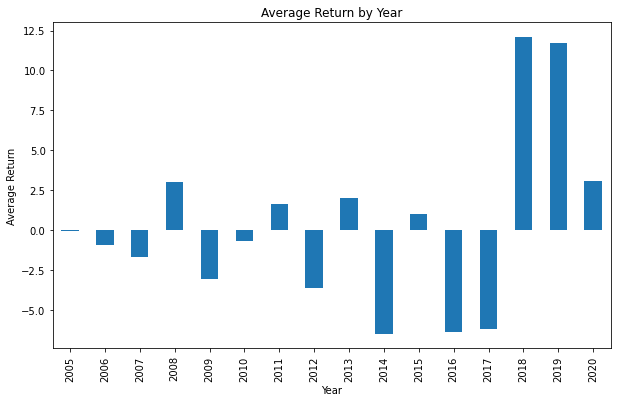

In [43]:
# Chart - 5 visualization code
# Group the data by year and calculate the average for each year for the
grouped = stock_df.groupby('Year').mean()['Return']

# Plot the bar graph
grouped.plot(kind='bar', figsize=(10, 6))

# Set the x-axis label
plt.xlabel('Year')

# Set the y-axis label
plt.ylabel('Average Return')

# Set the title
plt.title('Average Return by Year')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart was picked to understand the average returns of Yes Bank over the years. And it's easy to understand the average positive and negative return in a year with the help of bar chart.

##### 2. What is/are the insight(s) found from the chart?

The insights from the chart are that the average returns for the bank have been highly volatile with the highest return observed in 2018 and the lowest return observed in 2014. There is no clear trend in the average returns over the years.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The high volatility in the average returns indicates uncertainty and risk associated with investments in Yes Bank.

#### Chart - 6

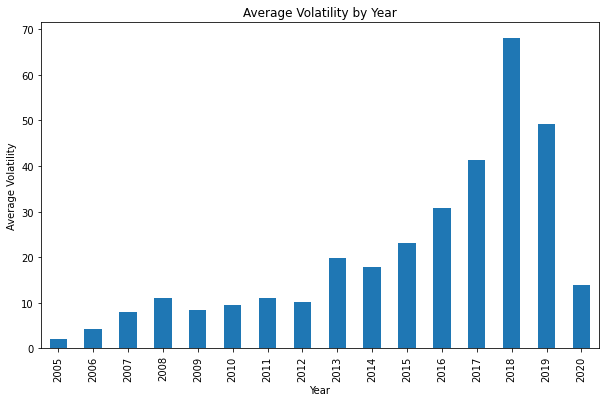

In [39]:
# Chart - 6 visualization code
# Group the data by year and calculate the average for each year for the
grouped = stock_df.groupby('Year').mean()['Volatility']

# Plot the bar graph
grouped.plot(kind='bar', figsize=(10, 6))

# Set the x-axis label
plt.xlabel('Year')

# Set the y-axis label
plt.ylabel('Average Volatility')

# Set the title
plt.title('Average Volatility by Year')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

The chart was chosen to visualize the trend in the average volatility of the stock prices of Yes Bank over the years.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that the average volatility of the stock prices has been on the higher side for most of the years, with some significant spikes in 2018 and 2019. However, it has been increasing since 2014 and sudden drop in 2020. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights may help in creating a positive business impact as it could indicate a higher risk associated with investing in Yes Bank's stock. Volatility infact is (high) - (low) price , So it shows the prices constantly increase till 2019.

#### Chart - 7

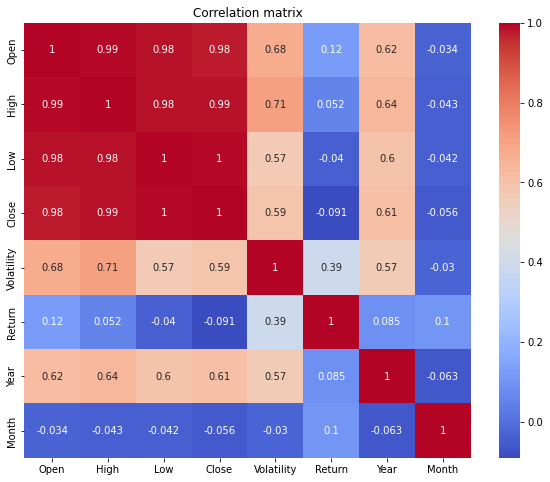

In [88]:
# Chart - 7 visualization code

# Visualizing correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(stock_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart, a heatmap of the correlation matrix, was chosen to visualize the relationship between different variables in the dataset.

##### 2. What is/are the insight(s) found from the chart?

We see low , high and close have a very strong co-relation with closing price.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help in creating a positive business impact by understanding the relationships between different variables and using them to make informed decisions.For example, the strong positive correlation between the closing price and the high price can be used to predict the future closing price based on the high price. We can also see that some of like the correlation between the closing price and the volatility indicates that a higher volatility may lead to not so sudden closing price, and Return is not at all good feature in predicting future prices as it have a neutral relation with closing price.

#### Chart - 8

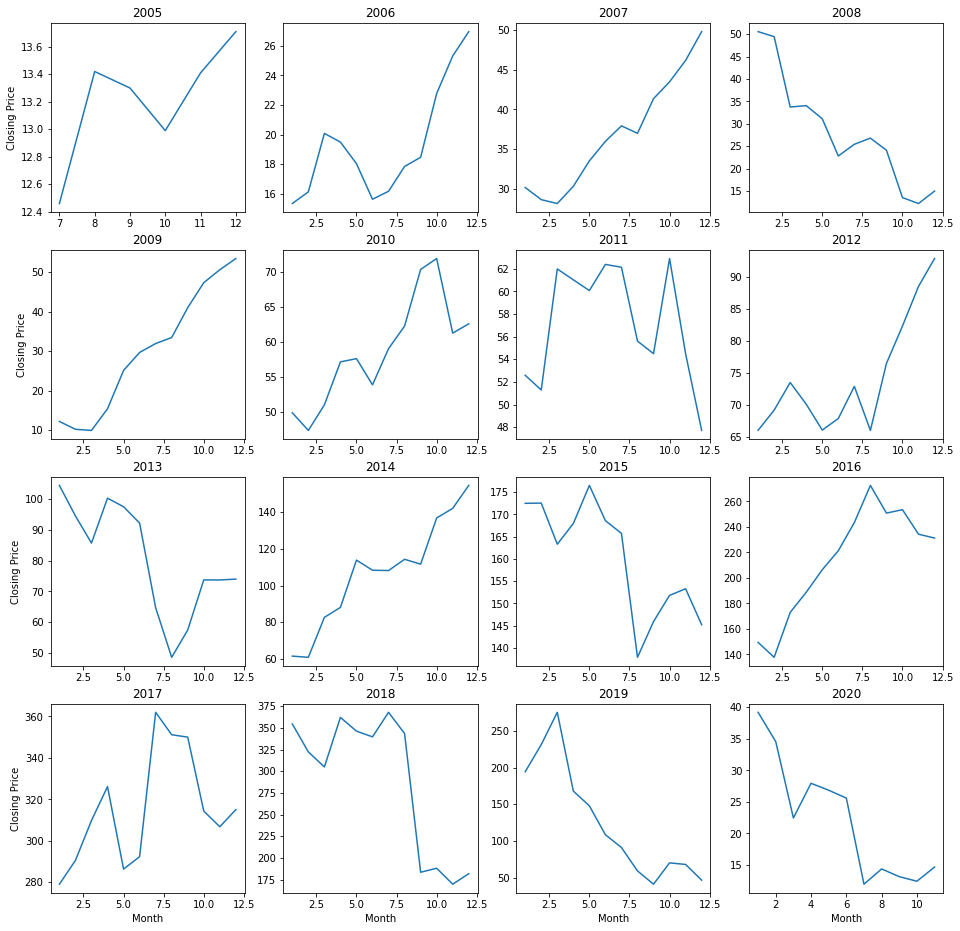

In [47]:
import matplotlib.pyplot as plt

# Group the data by year and month, and calculate the average closing price for each group
grouped = stock_df.groupby(['Year', 'Month'])['Close'].mean()

# Get the unique years in the data
years = stock_df['Year'].unique()


# Create a 4x4 grid of subplots
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

# Loop over each year and plot the monthwise closing prices
for i, year in enumerate(years):
    # Get the row and column indices for the current subplot
    row = i // 4
    col = i % 4
    
    # Select the data for the current year
    year_df = stock_df[stock_df['Year'] == year]
    
    # Plot the monthwise closing prices on the current subplot
    axs[row, col].plot(year_df['Month'], year_df['Close'])
    axs[row, col].set_title(year)
    
    # Set the x-axis label for the bottom row of subplots
    if row == 3:
        axs[row, col].set_xlabel('Month')

    # Set the y-axis label for the leftmost column of subplots
    if col == 0:
        axs[row, col].set_ylabel('Closing Price')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

I picked this specific chart to show the monthwise closing prices for every year in a compact and easily comparable way, using a 4x4 grid of subplots.

##### 2. What is/are the insight(s) found from the chart?

The chart shows the trend of the monthwise closing prices for each year in the data. It allows us to compare the closing prices of each month across different years and identify any patterns or trends over time.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This chart can be used to find any underlying trend , that can be useful to take informed decision to buy and sell stock.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Hypothesis Statement 1: The average closing price of the stock has increased over the years.

Hypothesis Statement 2: The stock prices are significantly higher in the second half of the year compared to the first half of the year.

Hypothesis Statement 3: There is a significant difference in the daily return of the stock during the years 2016-2017 and the years 2018-2019.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: The average closing price of the stock has not increased over the years.

Alternative hypothesis: The average closing price of the stock has increased over the years. 

#### 2. Perform an appropriate statistical test.

We will perform a one-sample t-test on the average closing prices over the years, with the null hypothesis being that the mean closing price is equal to the closing price in the first year of the dataset, and the alternative hypothesis being that the mean closing price is greater than the closing price in the first year of the dataset.

In [48]:
from scipy.stats import ttest_1samp

# Calculate the mean closing price for the first year
first_year_mean = stock_df[stock_df['Year'] == 2005]['Close'].mean()

# Perform the one-sample t-test
t_stat, p_val = ttest_1samp(stock_df['Close'], first_year_mean)

print('P Value :' , p_val)
# Check if the p-value is less than the significance level of 0.05
if p_val < 0.05:
    print("Reject the null hypothesis. The average closing price of the stock has increased over the years.")
else:
    print("Fail to reject the null hypothesis. The average closing price of the stock has not increased over the years.")


P - Value : 6.400826068350947e-27
Reject the null hypothesis. The average closing price of the stock has increased over the years.


##### Which statistical test have you done to obtain P-Value?

one-sample t-test

##### Why did you choose the specific statistical test?

We chose the one-sample t-test because we are comparing the mean closing price of the stock over the years with the closing price in the first year of the dataset.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis : The mean stock price in the second half of the year is not significantly higher than the mean stock price in the first half of the year.

Alternate Hypothesis : The mean stock price in the second half of the year is significantly higher than the mean stock price in the first half of the year.

#### 2. Perform an appropriate statistical test.

In [51]:
# Perform Statistical Test to obtain P-Value
 #we will use two-sample t-test to compare the mean closing prices of the first half of the year (January to June) 
 #with those of the second half of the year (July to December).

In [63]:
# Split the data into two groups - first half and second half of the year
first_half = stock_df[stock_df['Month'] <= 6]['Close']
second_half = stock_df[stock_df['Month'] > 6]['Close']

# Perform two-sample t-test
from scipy.stats import ttest_ind
t_statistic, p_value = ttest_ind(first_half, second_half, equal_var=False)

print('P-value:', p_value)

# Check if the p-value is less than the significance level of 0.05
if p_value < 0.05:
    print("Reject the null hypothesis. The mean stock price in the second half of the year is significantly higher than the mean stock price in the first half of the year.")
else:
    print("Fail to reject the null hypothesis. The mean stock price in the second half of the year is not significantly higher than the mean stock price in the first half of the year")


P-value: 0.43140639715703033
Fail to reject the null hypothesis. The mean stock price in the second half of the year is not significantly higher than the mean stock price in the first half of the year


##### Which statistical test have you done to obtain P-Value?

Two sample t - test

##### Why did you choose the specific statistical test?

We chose a two-sample t-test because we are comparing the two independent groups (first half and second half of the year).

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: The daily return of the stock during the years 2016-2017 is not significantly different from the daily return of the stock during the years 2018-2019.

Alternate Hypothesis: The daily return of the stock during the years 2016-2017 is significantly different from the daily return of the stock during the years 2018-2019.

#### 2. Perform an appropriate statistical test.

In [64]:
# Perform Statistical Test to obtain P-Value
df_16_17 = stock_df[(stock_df['Year'] == 2016) | (stock_df['Year'] == 2017)]
df_18_19 = stock_df[(stock_df['Year'] == 2018) | (stock_df['Year'] == 2019)]

# mean of the return for year 16-17 and 18-19
mean_16_17 = df_16_17['Return'].mean()
mean_18_19 = df_18_19['Return'].mean()


# Perform two-sample t-test

t_stat, p_value = ttest_ind(df_16_17['Return'], df_18_19['Return'], equal_var=False)
print('p-value:', p_value)


# Check if the p-value is less than the significance level of 0.05
if p_value < 0.05:
    print("Reject the null hypothesis. The daily return of the stock during the years 2016-2017 is significantly different from the daily return of the stock during the years 2018-2019")
else:
    print("Fail to reject the null hypothesis. The daily return of the stock during the years 2016-2017 is not significantly different from the daily return of the stock during the years 2018-2019.")


p-value: 0.10538947555128328
Fail to reject the null hypothesis. The daily return of the stock during the years 2016-2017 is not significantly different from the daily return of the stock during the years 2018-2019.


##### Which statistical test have you done to obtain P-Value?

Two sample t - test

##### Why did you choose the specific statistical test?

We chose a two-sample t-test because we are comparing the means of two independent samples (the monthly returns of the stock in the years 2016-2017 and 2018-2019).

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [175]:
# Calculate the correlation matrix between all features and the 'Close' feature
corr_matrix = stock_df.corr()['Close']

# Sort the correlations in descending order
sorted_corr = corr_matrix.abs().sort_values(ascending=False)

# Print the top N features with the highest correlations
N = 10 # Change this to the desired number of features to show
print(sorted_corr.head(N))

Close         1.000000
Low           0.995358
High          0.985051
Open          0.977971
Year          0.608408
Volatility    0.594724
Return        0.090782
Month         0.055796
Name: Close, dtype: float64


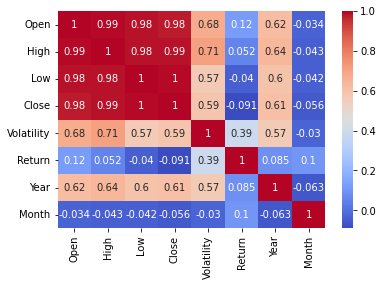

In [176]:
#Finding the co-relation between the features
corr_matrix = stock_df.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

#### 2. Feature Selection

In [177]:
# Select your features wisely to avoid overfitting

# We will remove high,open
stock_df.drop(columns = ['High','Open'], inplace = True)

stock_df

,Date,Low,Close,Volatility,Return,Year,Month
0,2005-07-01,11.25,12.46,2.75,0.54,2005,7
1,2005-08-01,12.55,13.42,2.33,-0.84,2005,8
2,2005-09-01,12.27,13.30,2.60,0.18,2005,9
3,2005-10-01,12.40,12.99,2.07,0.21,2005,10
4,2005-11-01,12.88,13.41,1.00,-0.06,2005,11
...,...,...,...,...,...,...,...
180,2020-07-01,11.10,11.95,17.20,13.65,2020,7
181,2020-08-01,11.85,14.37,5.31,-2.37,2020,8
182,2020-09-01,12.75,13.15,2.59,1.15,2020,9
183,2020-10-01,12.11,12.42,1.90,0.88,2020,10


##### What all feature selection methods have you used  and why?

We used co-relation method to check which features are highly co-related and removed them. Beacause they doesn't provide additional info for the Close feature.

##### Which all features you found important and why?

Low,Year,Volatility,Return,Month features imporntant as they have co-relation values with the Close feature that can be heplful in prediction.           

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [182]:
# Transform Your data

#copy the dataset
data = stock_df.copy()

# Drop the Date column as it is not needed for the model
data = data.drop(['Date'], axis=1)

# Split the data into features (X) and target (y)
X = data.drop(['Close'], axis=1)
y = data['Close']


### 6. Data Scaling

In [183]:
from sklearn.preprocessing import StandardScaler

# Scale the data

scaler = StandardScaler()
X = scaler.fit_transform(X)


##### Which method have you used to scale you data and why?
We used Standard Scaler , So all features can be on same scale and it will also improve mode performance.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

No , We have already performed feature selection and scaling. The number of features isn't too large to there be a need to further reduce the dimensionality of the data.

In [ ]:
# DImensionality Reduction (If needed)

### 8. Data Splitting

In [184]:
# Split your data to train and test. Choose Splitting ratio wisely.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##### What data splitting ratio have you used and why? 

80:20 , As this is most commonly used split.

## ***7. ML Model Implementation***

### ML Model - 1

In [207]:
# ML Model - 1 Implementation

# Fit the Algorithm
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the model
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = model.score(X_test, y_test)
print("Accuracy:", round(accuracy*100,2) ,"%")

Accuracy: 99.66 %


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The code uses linear regression as the ML model to predict the "Close" price based on the other features in the dataset. Linear regression is a statistical method for modeling the relationship between a dependent variable (in this case, "Close" price) and one or more independent variables (the other features in the dataset). It assumes that there is a linear relationship between the dependent variable and each independent variable.

In [147]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

Mean Absolute Error: 3.1957839075411583
Mean Squared Error: 27.31837425748714
Root Mean Squared Error: 5.226698217564042
R-squared Score: 0.9966396000741085


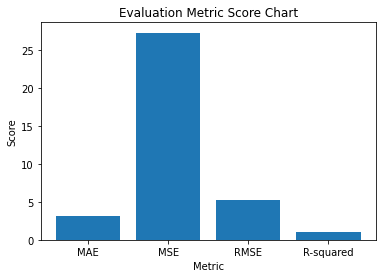

In [148]:
# Visualizing evaluation Metric Score chart

# Evaluation Metric Score Chart
metric_scores = {
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'R-squared': r2,
}

# Create a bar chart of the metric scores
fig, ax = plt.subplots()
ax.bar(metric_scores.keys(), metric_scores.values())

# Add labels and title
ax.set_xlabel('Metric')
ax.set_ylabel('Score')
ax.set_title('Evaluation Metric Score Chart')

# Show the plot
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [151]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV

# Define the range of hyperparameters to explore
params = {'fit_intercept': [True, False],
          'normalize': [True, False]}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=LinearRegression(),
                           param_grid=params,
                           cv=5,
                           scoring='r2')

# Fit the Algorithm
grid_search.fit(X_train, y_train)

# Predict on the model
y_predg = grid_search.predict(X_test)

# Get the best hyperparameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the results
print("Best parameters: ", best_params)
print("Best score: ", best_score)

Best parameters:  {'fit_intercept': True, 'normalize': True}
Best score:  0.9977013252489279


C:\Users\saura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\saura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous be

##### Which hyperparameter optimization technique have you used and why?

We used GridSearchCV  , As it searches over a given parameter grid to find the best combination of hyperparameters . And its good choice when features are low.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [152]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_predg)
mse = mean_squared_error(y_test, y_predg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predg)

# Print the evaluation metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

Mean Absolute Error: 3.195783907541158
Mean Squared Error: 27.31837425748728
Root Mean Squared Error: 5.226698217564056
R-squared Score: 0.9966396000741085


We can see a little changes , as the model is already overfitted in the given dataset , We dont need to go with cross validation.

### ML Model - 2

In [205]:
# ML model 2 implementation
from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error:", mse)
print("R2 score:", r2)

Mean squared error: 115.87068896783799
R2 score: 0.9871807914275171


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The ML model used is Random Forest Regression. It is an ensemble learning method that builds a large number of decision trees at training time and outputs the mean prediction of the individual trees as the final prediction. It is used to predict stock prices based on the features given in the dataset, such as low, volatility, return, year, month, and price change.

#### 2. Cross- Validation & Hyperparameter Tuning

In [155]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create the Random Forest model
model = RandomForestRegressor(random_state=42)

# Define the GridSearchCV object with the model and parameter grid
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the model on the full training set with the best hyperparameters
best_model = RandomForestRegressor(random_state=42, **best_params)
best_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Calculate the evaluation metrics for the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the results
print("Best parameters:", best_params)
print("Best score:", best_score)
print("R^2 score:", r2)
print("MSE:", mse)

Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Best score: 0.990829913570242
R^2 score: 0.9893217350115355
MSE: 86.80896494726147


##### Which hyperparameter optimization technique have you used and why?

We used GridSearchCV  , As it searches over a given parameter grid to find the best combination of hyperparameters . And its good choice when features are low.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

We can see a little changes , as the model is already overfitted in the given dataset , We dont need to go with cross validation.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

R2 score : It helps in explaining the variability in the target variable. It ranges between 0 and 1. Here it's value is 0.98 which means that we can define 98% variability in the target variable. Which will be helpful in indicating business that we can predict the tareget variable with less variability.

MSE : MSE is the average of the squared differences between the predicted and actual values. It is used to evaluate the overall quality of the model. A low MSE indicates a better model. In business, MSE can be used to evaluate the performance of the model 


### ML Model - 3

In [216]:
# Split the data into training and testing sets
from sklearn.svm import SVR

X_train, X_test, y_train, y_test = train_test_split(stock_df.drop(columns=["Date", "Close"]), stock_df["Close"], test_size=0.2, random_state=42)

# Fit the SVR model
model = SVR(kernel="rbf")
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 9837.874865220316
R2 Score: -0.08840096603077008


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Define the SVR model and hyperparameter grid for tuning
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

# Split the training set into training and validation sets using time series cross-validation

cv = TimeSeriesSplit(n_splits=5)

model = SVR()
params = {
    "kernel": ["linear", "poly", "rbf"],
    "C": [0.1, 1, 10],
    "gamma": ["scale", "auto"]
}

# Perform grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(model, params, cv=cv, scoring="neg_mean_squared_error")
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and their mean squared error on the validation set
print("Best hyperparameters:", grid_search.best_params_)
print("Validation set MSE:", -grid_search.best_score_)

# Train the model on the entire training set using the best hyperparameters
best_model = SVR(**grid_search.best_params_)
X_train = train.drop(columns=["Date", "Close"])
y_train = train["Close"]
best_model.fit(X_train, y_train)

# Evaluate the model on the test set
X_test = test.drop(columns=["Date", "Close"])
y_test = test["Close"]
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Test set MSE:", mse)

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***